# Learning Perception Through the CBF-QP 

## Imports

### Learning Imports 

In [1]:
import torch
from torchvision import transforms
from torch.autograd import Function, Variable
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import csv
import pandas as pd 
from torch.utils.data import Dataset, DataLoader
# from tqdm.notebook import tqdm
from tqdm import tqdm
from datetime import datetime
import os


### Optnet Differentiable GPU-able QP Solver

In [2]:
# Differentiable QP Package
from qpth.qp import QPFunction, QPSolvers

### Import Perception Network

In [3]:
from myMobileNetV2 import * 
from torchvision import transforms
from PIL import Image

# Image Preprocessing Function for Learning Network
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


### Set Torch Parameters

In [4]:
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
os.system("mkdir ./SaveMobNetModels/"+timestamp )
dtype = torch.float
device = torch.device("cuda")

## Create Dataset

In [5]:
convert_tensor = transforms.ToTensor()

k = 50 # scale 
class ImgStateDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.path = '/home/ryan/Documents/TripleCamera/AirSim/PythonClient/cdc22/datasets/dataset2022_03_24_Mar_03_1648181271/' #'./image_data/'#  img_' + str(i) + '.jpg'
        self.img_csv = pd.read_csv(self.path + "controller_data.csv")

    def __len__(self):
        return int(len(self.img_csv)/k)

    def __getitem__(self, idx):
        idx = idx*k
        if torch.is_tensor(idx):
            idx = idx.tolist()

        i = self.img_csv["i"][idx]
        u1 = float(self.img_csv["u1"][idx])
        u2 = float(self.img_csv["u2"][idx])
        u = torch.tensor([u1, u2])
        img = Image.open(self.path + "imgs/img_"+str(i)+".png")
        img_tensor = convert_tensor(img)
        
        return img_tensor, u

#### Visualize Dataset

Input =  tensor([ 2.5288, -1.4931])


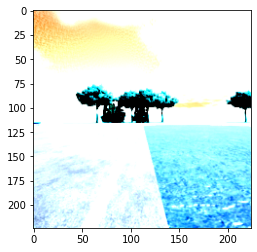

Input =  tensor([ 2.5432, -1.1081])


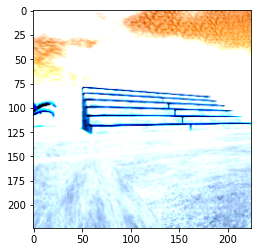

Input =  tensor([ 2.5535, -1.0125])


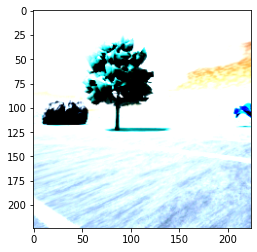

Input =  tensor([-0.8146, -1.1993])


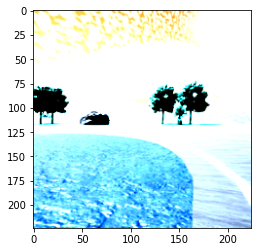

Input =  tensor([-1.6355, -1.7692])


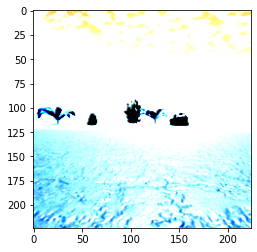

Input =  tensor([-0.0650, -1.9795])


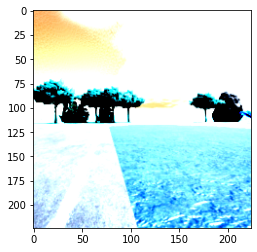

Input =  tensor([ 2.5818, -1.2184])


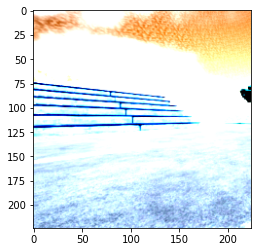

Input =  tensor([ 2.5856, -1.0872])


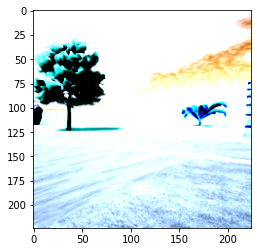

Input =  tensor([-0.5584, -1.0763])


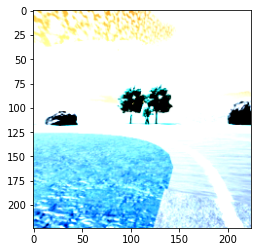

Input =  tensor([-1.6554, -1.7432])


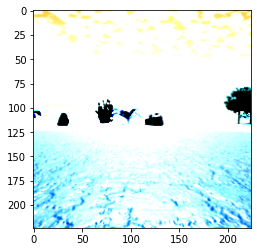

In [6]:

full_dataset = ImgStateDataset()

x_imgs = []
for i in range(10):
    sample = full_dataset[i]
    plt.figure()
    plt.imshow(sample[0].permute(1,2,0))
    x_imgs.append(sample[0])
    print("Input = ",  sample[1])
    plt.show()



### Create train-test splits

In [7]:
train_size = int(1.0 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

In [8]:
train_dataloader = DataLoader(train_dataset, batch_size = 64, shuffle= True) #int(train_size*0.25), shuffle=True)


# Test MobileNetV2 Just Regression
Here we take the images that we generated and get mobilenet to learn the relationship between the images and the state directly. The loss is the L1 loss on the predicted state versus the true state. We don't use the filtered inputs yet. 

In [11]:
JUST_MOBNET = True

if JUST_MOBNET: 

    """
    Test Mobile Net Just Regression
    """

    net = MobileNetV2(width_mult = 1, states = 2)
    net.train()



100%|████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.53s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_0.pth
[0, 1,    11] training loss: 0.26886799478311146


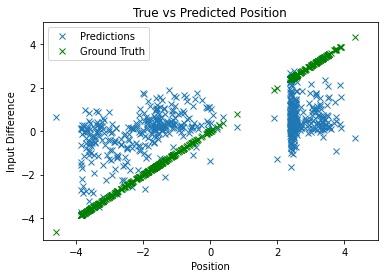

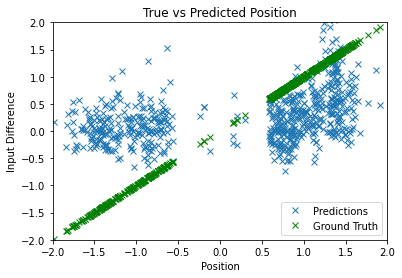

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_1.pth
[0, 2,    11] training loss: 0.2370528554037419


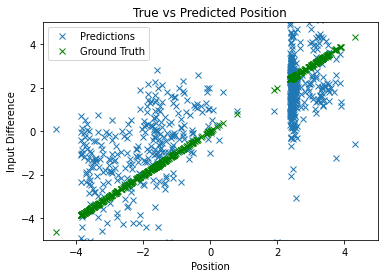

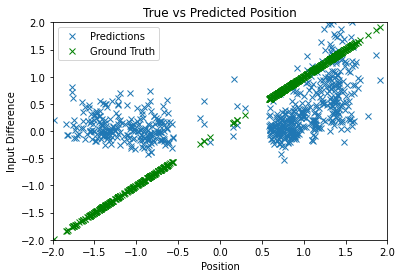

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_2.pth
[0, 3,    11] training loss: 0.22407934852459466


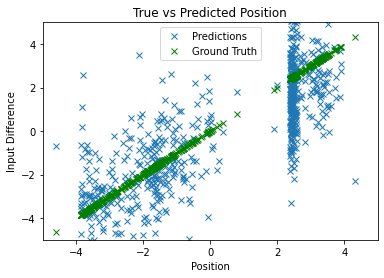

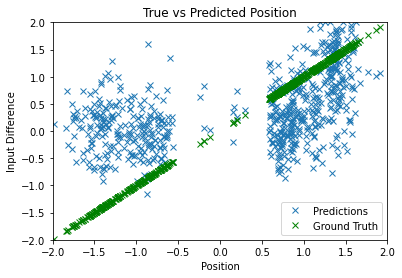

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.55s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_3.pth
[0, 4,    11] training loss: 0.20568520883627567


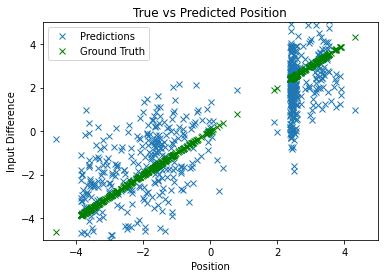

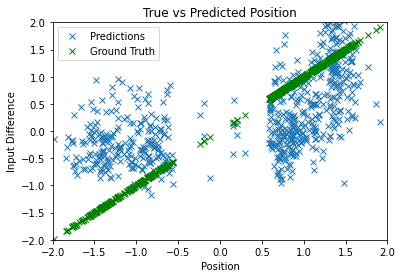

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_4.pth
[0, 5,    11] training loss: 0.17657775428437963


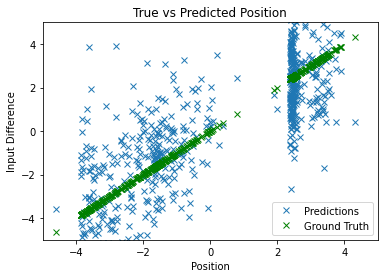

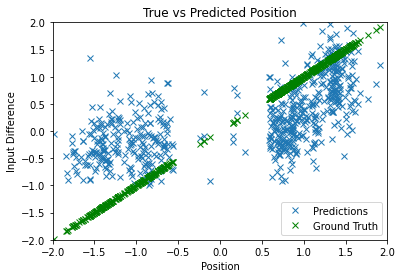

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_5.pth
[0, 6,    11] training loss: 0.17343220458052672


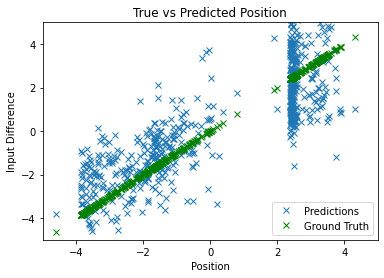

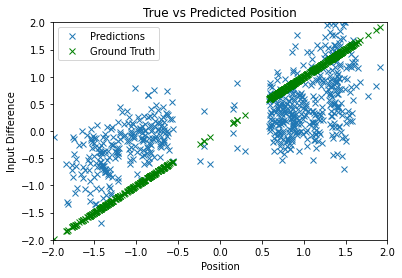

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

[0, 7,    11] training loss: 0.18072665424390874


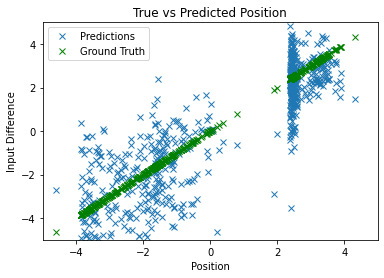

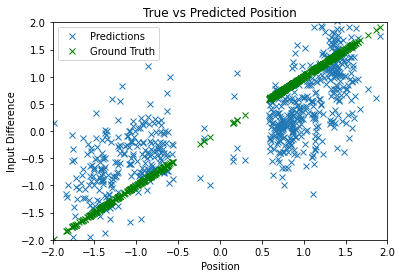

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

[0, 8,    11] training loss: 0.7384879100157917


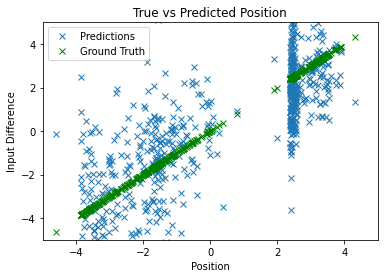

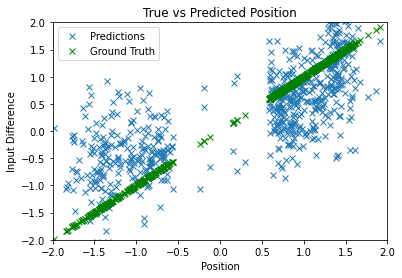

100%|████████████████████████████████████████████████████████████████| 11/11 [00:40<00:00,  3.66s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_8.pth
[0, 9,    11] training loss: 0.16573776993700257


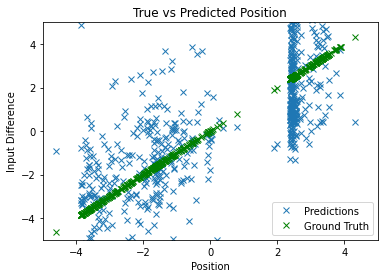

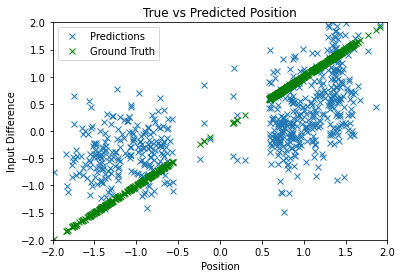

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

[0, 10,    11] training loss: 0.1914771998532906


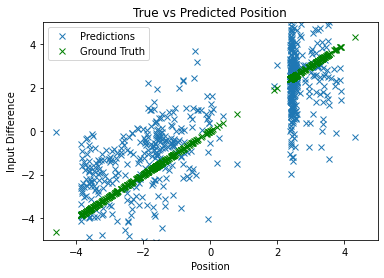

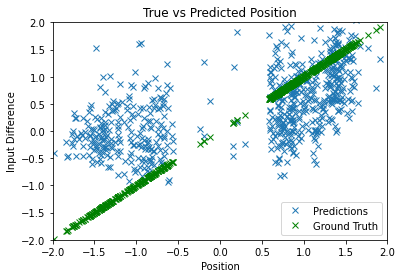

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_10.pth
[0, 11,    11] training loss: 0.1395108243836785


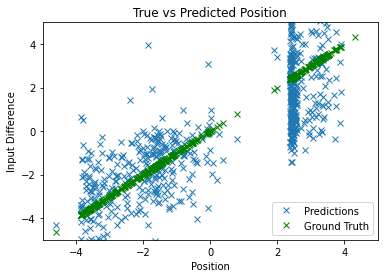

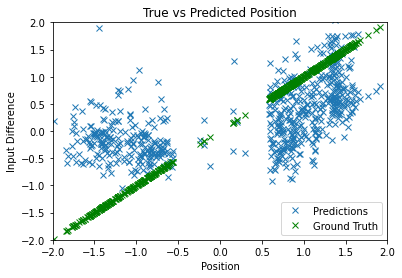

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_11.pth
[0, 12,    11] training loss: 0.12886803490774973


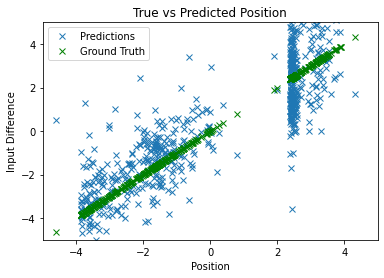

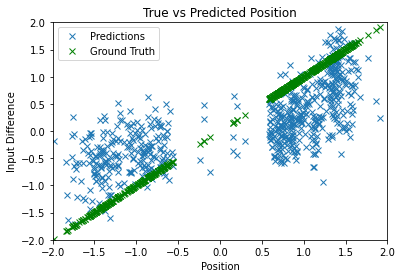

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_12.pth
[0, 13,    11] training loss: 0.10102316128310336


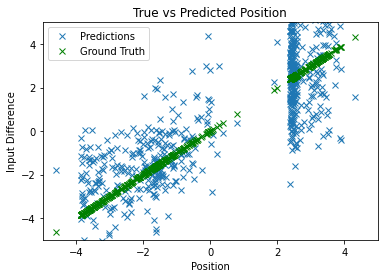

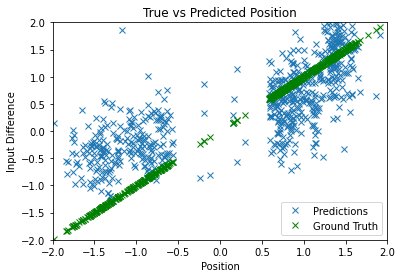

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.63s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_13.pth
[0, 14,    11] training loss: 0.09712085333837343


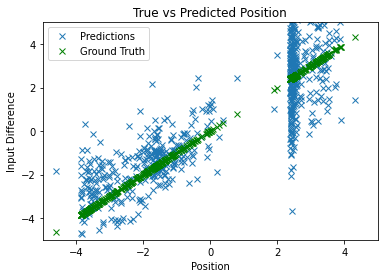

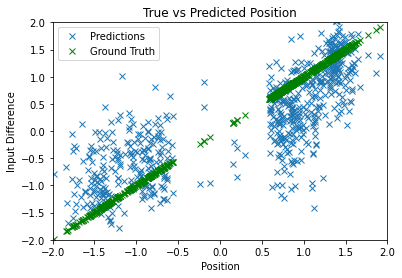

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_14.pth
[0, 15,    11] training loss: 0.09678081286850795


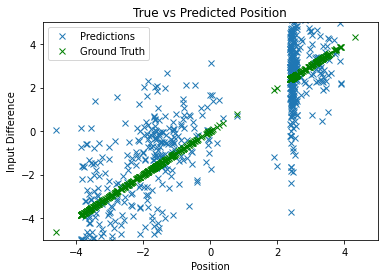

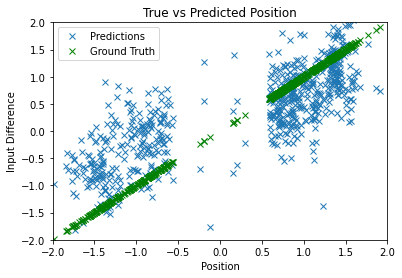

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

[0, 16,    11] training loss: 0.10167316202011342


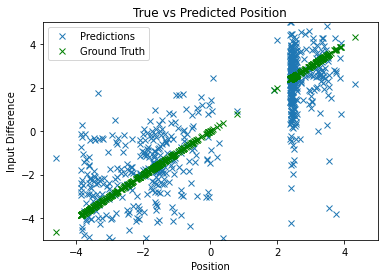

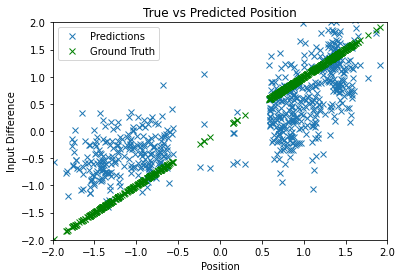

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_16.pth
[0, 17,    11] training loss: 0.09519756829134333


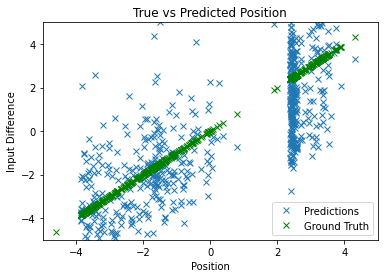

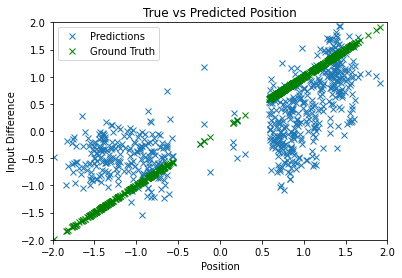

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.56s/it]

[0, 18,    11] training loss: 0.16617519826200516


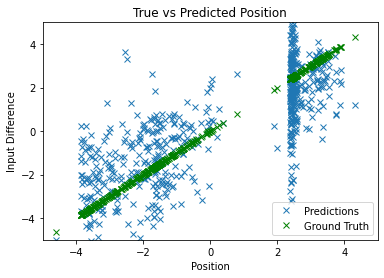

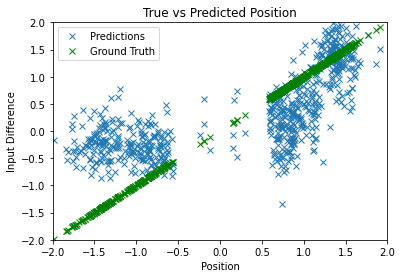

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_18.pth
[0, 19,    11] training loss: 0.09452809899267145


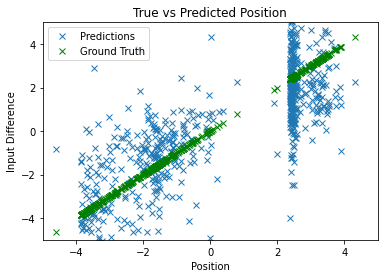

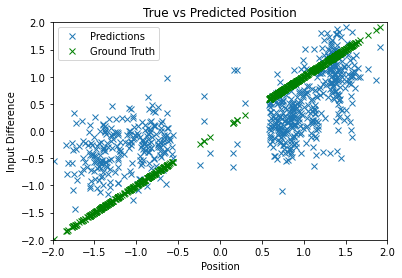

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_19.pth
[0, 20,    11] training loss: 0.05775555945394958


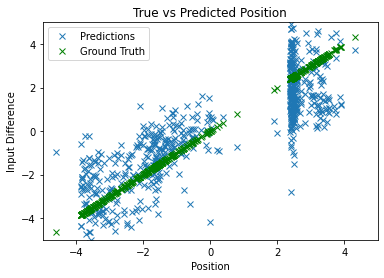

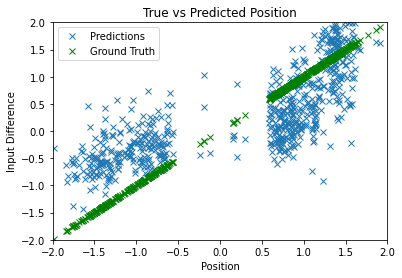

100%|████████████████████████████████████████████████████████████████| 11/11 [00:40<00:00,  3.65s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_0.pth
[1, 1,    11] training loss: 0.04426272527047199


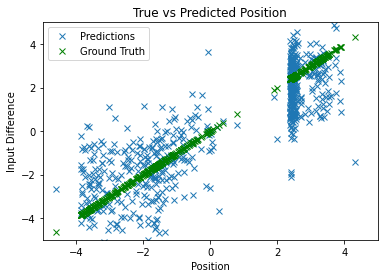

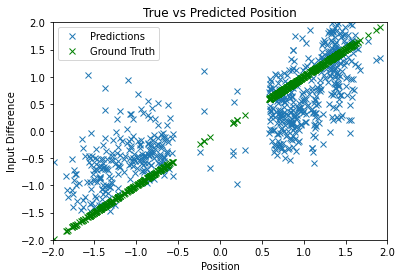

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_1.pth
[1, 2,    11] training loss: 0.03195749362859126


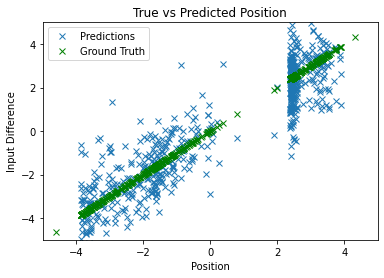

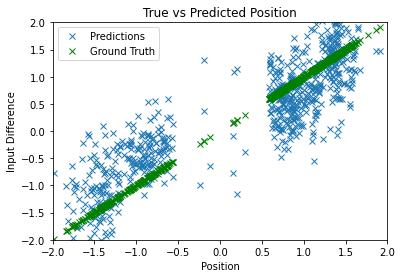

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_2.pth
[1, 3,    11] training loss: 0.028213939267552574


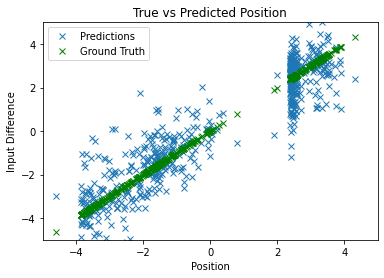

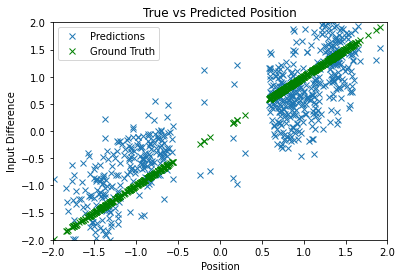

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_3.pth
[1, 4,    11] training loss: 0.026966884297343077


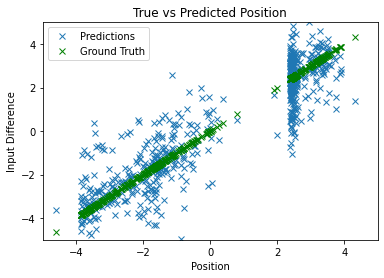

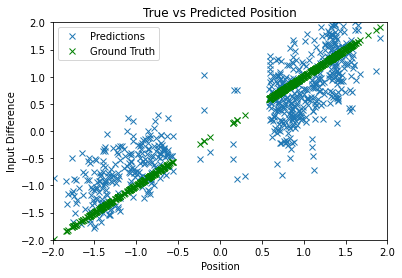

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_4.pth
[1, 5,    11] training loss: 0.021204555890710308


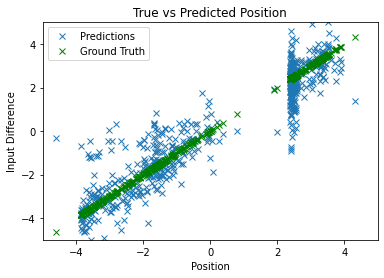

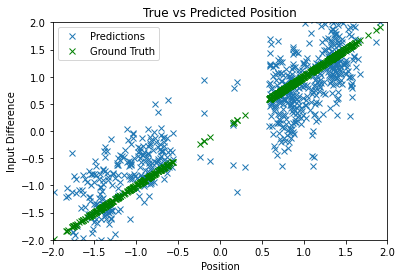

100%|████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.51s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_5.pth
[1, 6,    11] training loss: 0.020088058897793384


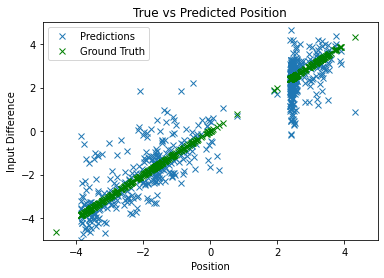

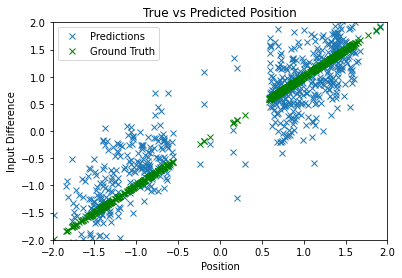

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_6.pth
[1, 7,    11] training loss: 0.017145791109622714


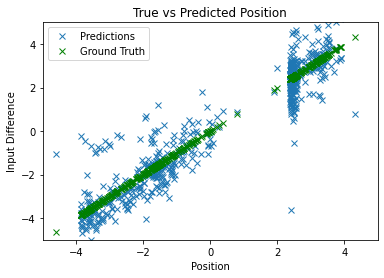

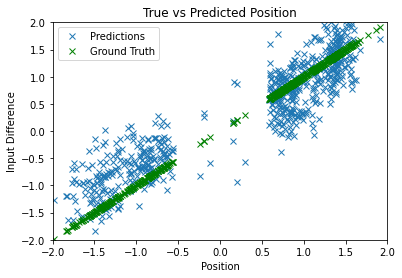

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

[1, 8,    11] training loss: 0.018243819292056762


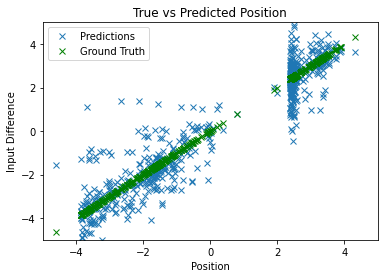

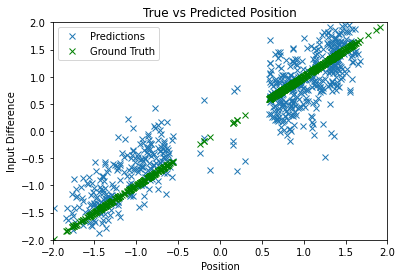

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_8.pth
[1, 9,    11] training loss: 0.01594086927569224


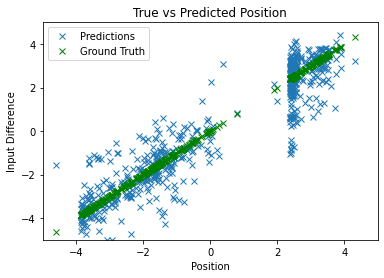

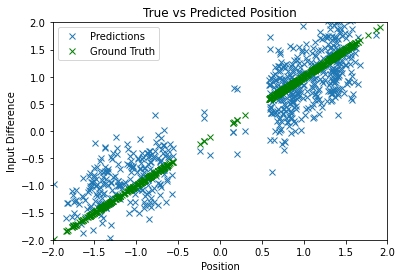

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_9.pth
[1, 10,    11] training loss: 0.015226021752379457


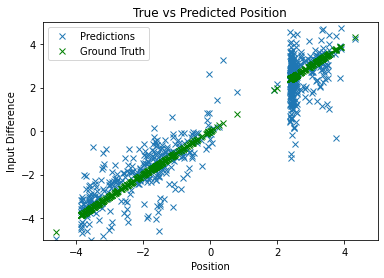

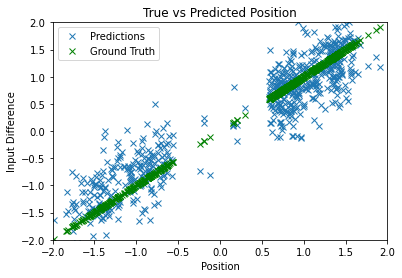

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.57s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_10.pth
[1, 11,    11] training loss: 0.013525126876735833


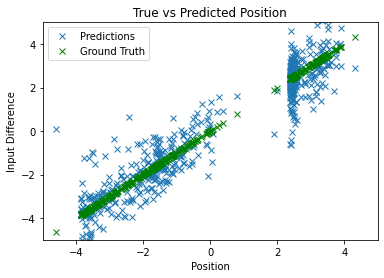

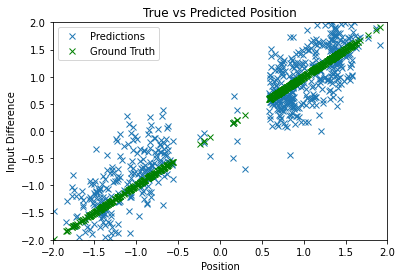

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.55s/it]

[1, 12,    11] training loss: 0.3660407311035557


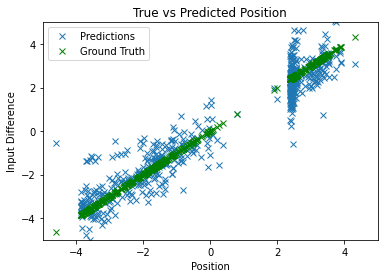

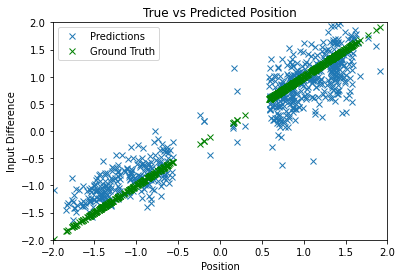

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_12.pth
[1, 13,    11] training loss: 0.015021594347126108


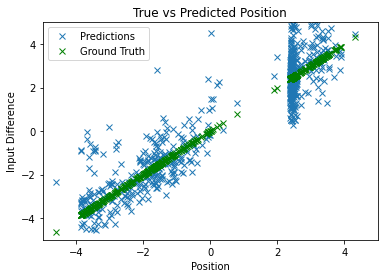

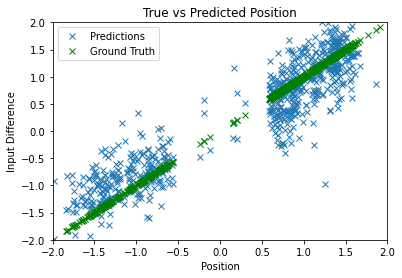

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_13.pth
[1, 14,    11] training loss: 0.014518829534680065


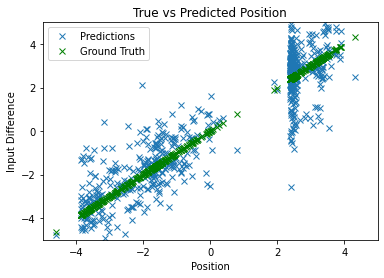

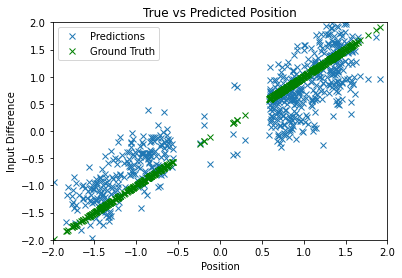

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_14.pth
[1, 15,    11] training loss: 0.010352185176264855


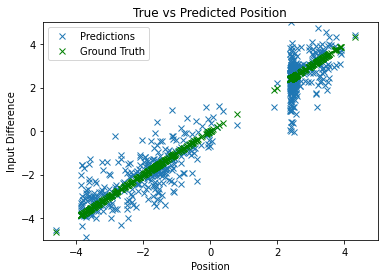

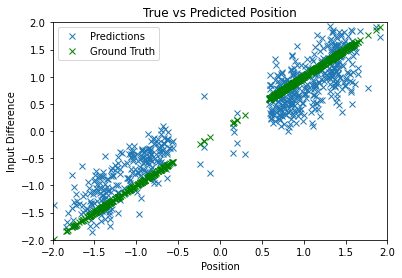

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

[1, 16,    11] training loss: 0.024394948418880204


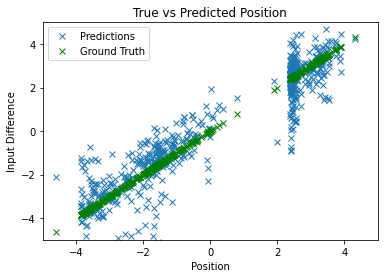

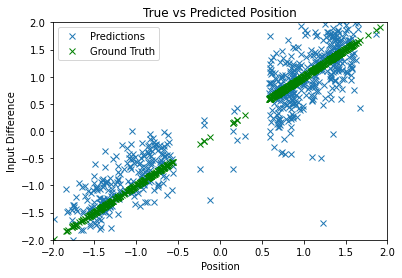

100%|████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.54s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_16.pth
[1, 17,    11] training loss: 0.010274129872497874


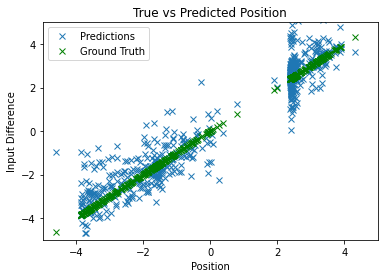

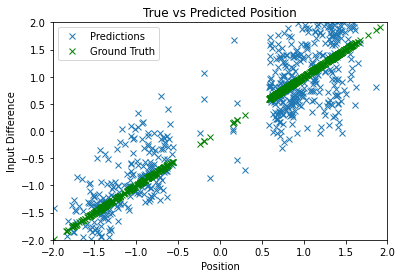

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_17.pth
[1, 18,    11] training loss: 0.009596069424932454


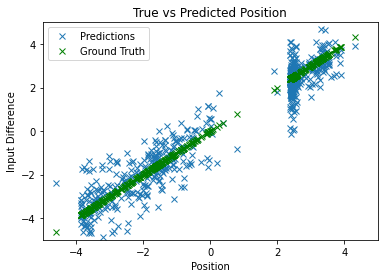

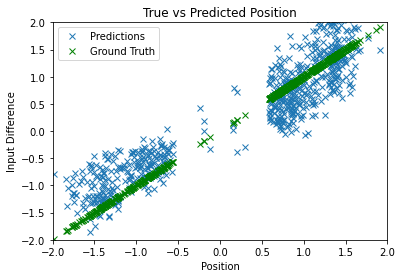

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.57s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_18.pth
[1, 19,    11] training loss: 0.008091758324345503


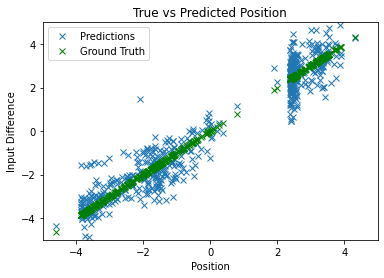

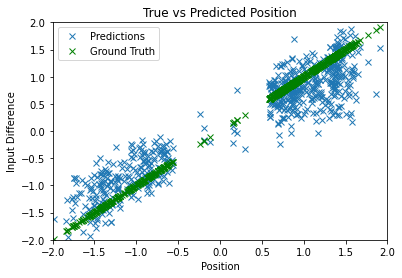

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_19.pth
[1, 20,    11] training loss: 0.006808399089745113


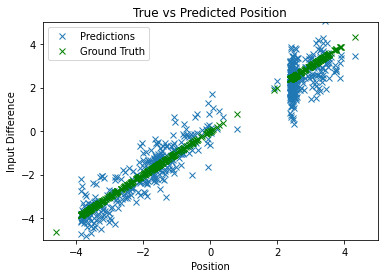

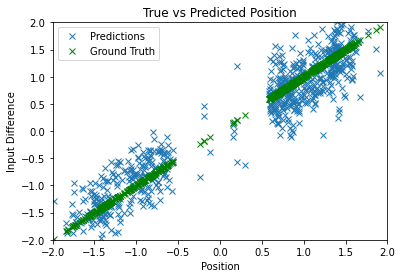

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_0.pth
[2, 1,    11] training loss: 0.00734456397947811


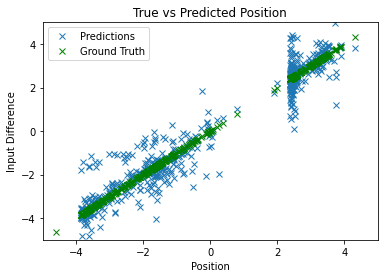

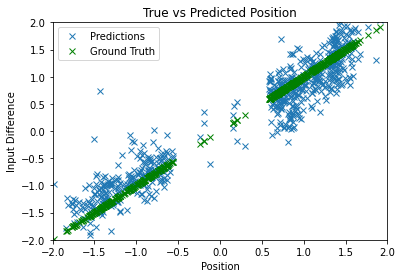

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_1.pth
[2, 2,    11] training loss: 0.004797010343470332


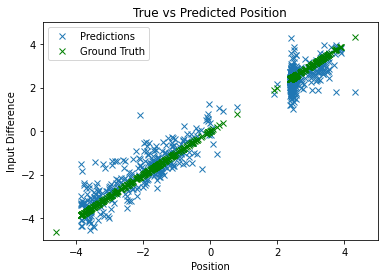

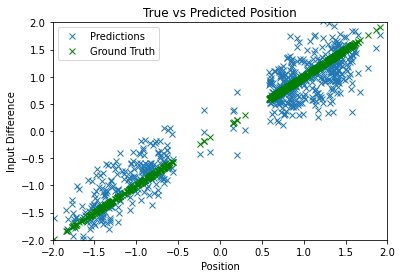

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_2.pth
[2, 3,    11] training loss: 0.00478552411183051


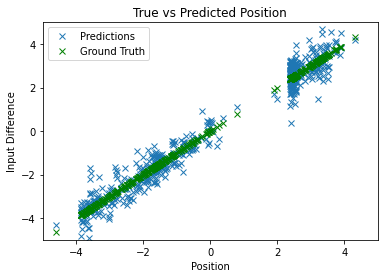

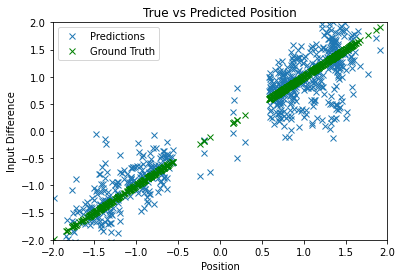

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

[2, 4,    11] training loss: 0.013691714974821254


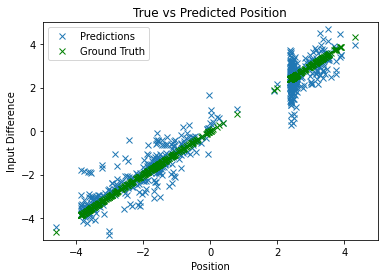

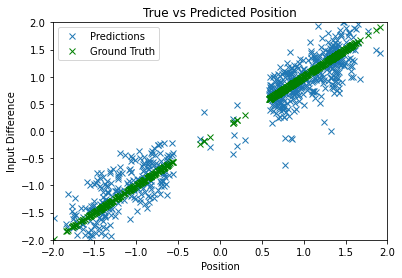

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_4.pth
[2, 5,    11] training loss: 0.006431140749502108


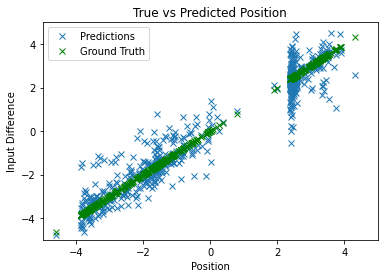

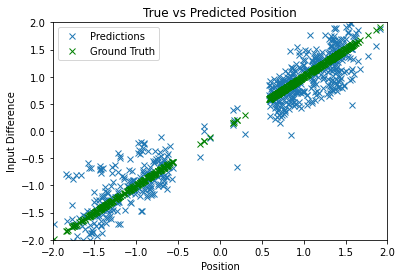

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_5.pth
[2, 6,    11] training loss: 0.0036821821776037026


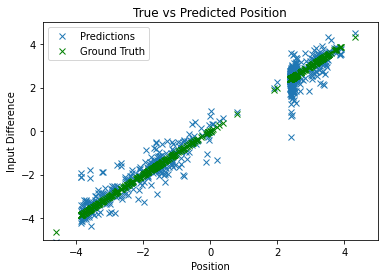

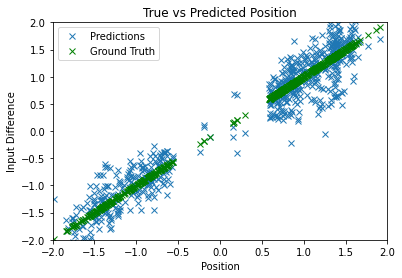

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

[2, 7,    11] training loss: 0.005902016561152199


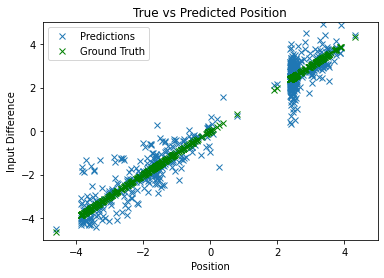

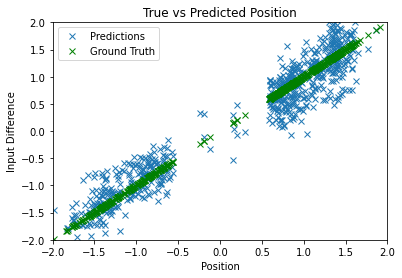

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_7.pth
[2, 8,    11] training loss: 0.004440508748529144


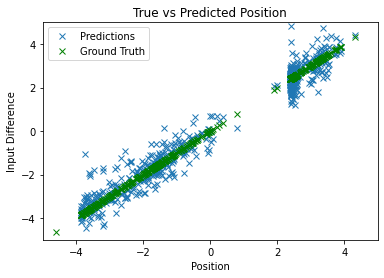

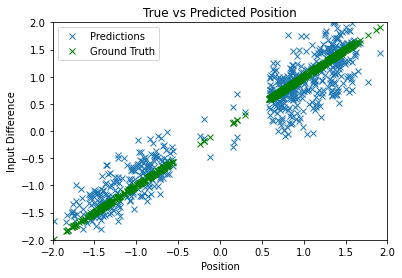

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_8.pth
[2, 9,    11] training loss: 0.004053873469203299


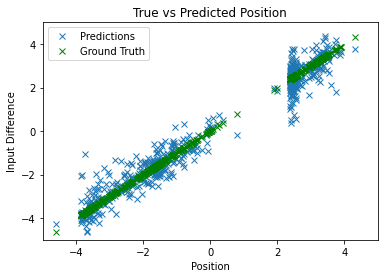

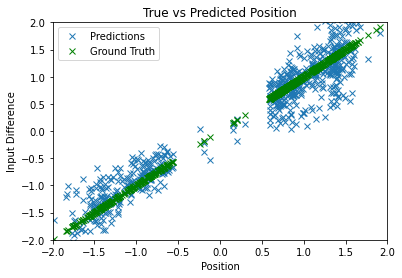

100%|████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.54s/it]

[2, 10,    11] training loss: 0.004913444640815898


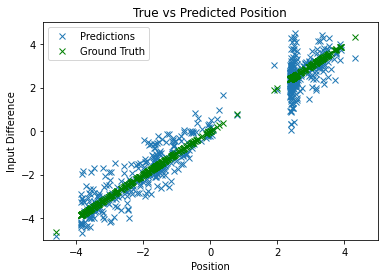

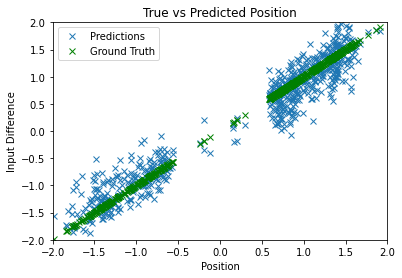

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

[2, 11,    11] training loss: 0.005245820294419009


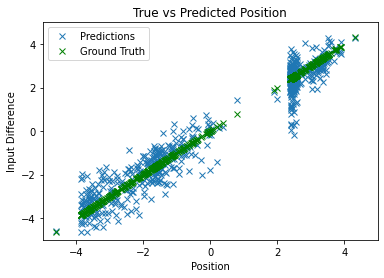

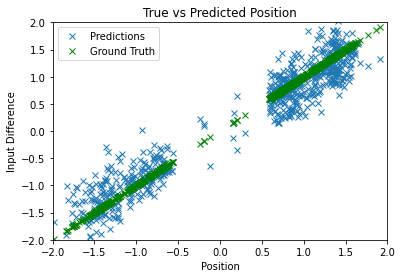

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_11.pth
[2, 12,    11] training loss: 0.0042568736133121315


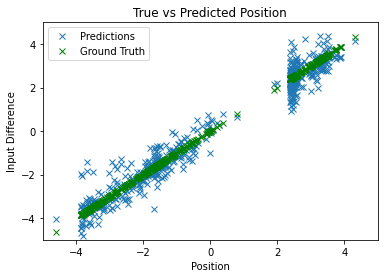

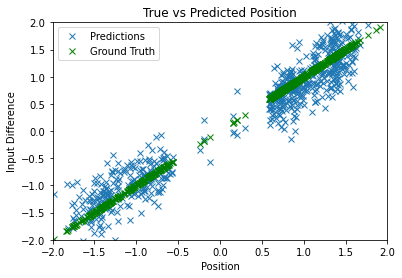

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_12.pth
[2, 13,    11] training loss: 0.0031359809724050367


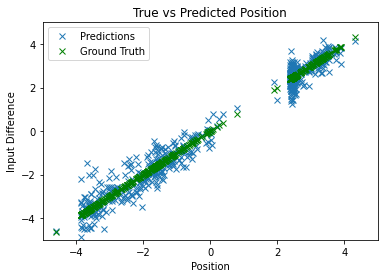

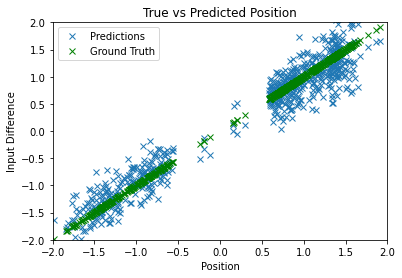

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

[2, 14,    11] training loss: 0.003817210240023476


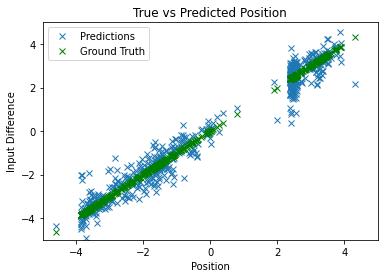

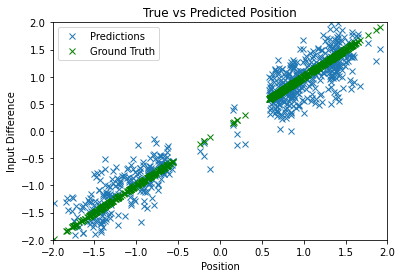

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

[2, 15,    11] training loss: 0.016433636805245767


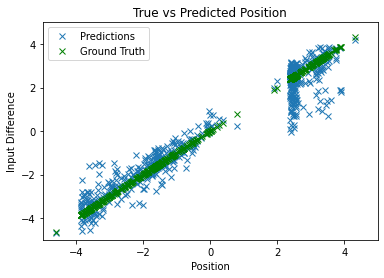

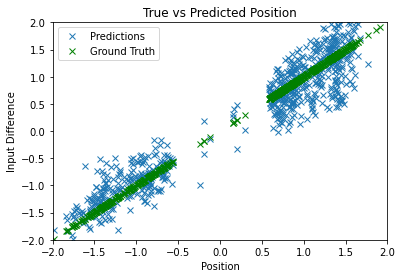

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_15.pth
[2, 16,    11] training loss: 0.007537848909833281


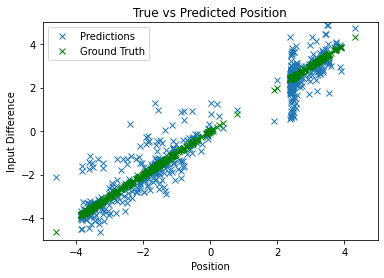

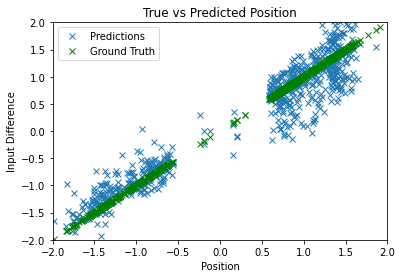

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_16.pth
[2, 17,    11] training loss: 0.00526270969626358


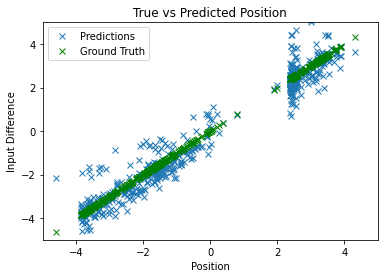

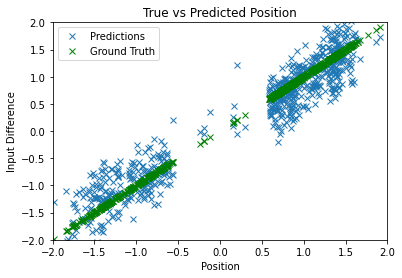

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_17.pth
[2, 18,    11] training loss: 0.0052028838344799575


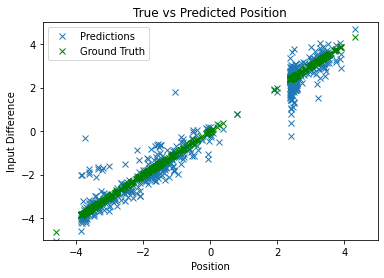

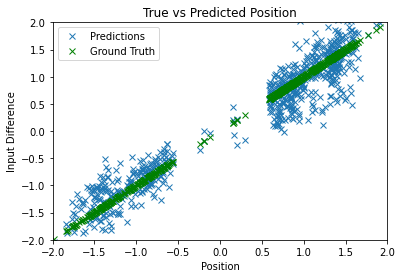

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

[2, 19,    11] training loss: 0.006675629915180295


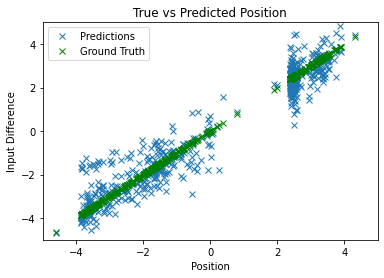

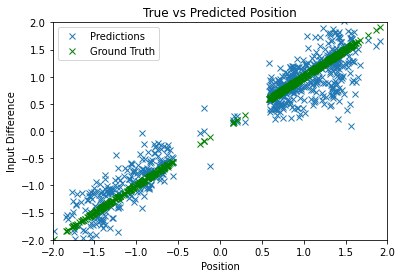

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_19.pth
[2, 20,    11] training loss: 0.004010179098666904


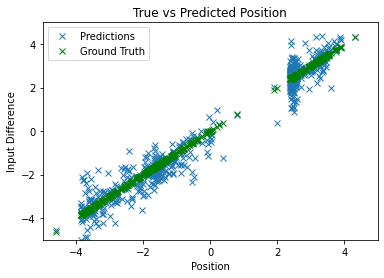

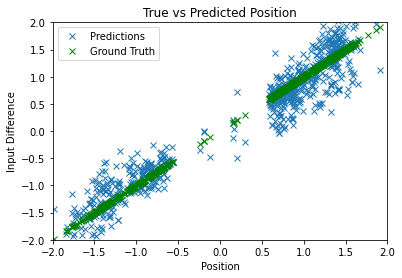

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.61s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_0.pth
[3, 1,    11] training loss: 0.006696186524840177


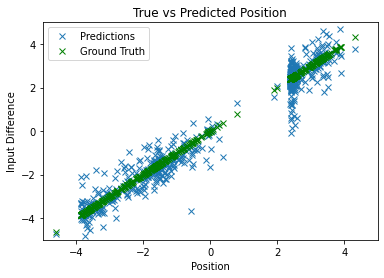

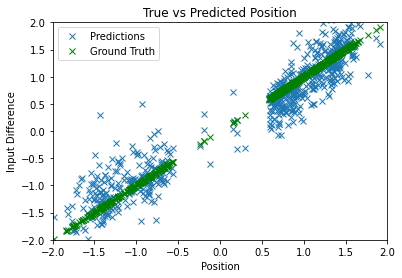

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_1.pth
[3, 2,    11] training loss: 0.004210306958119441


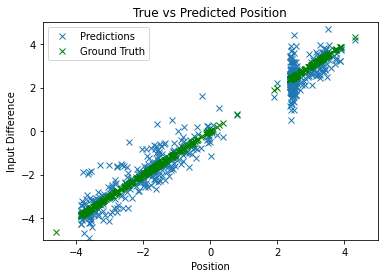

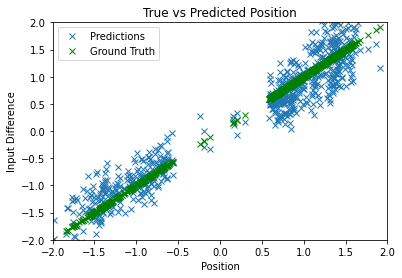

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.55s/it]

[3, 3,    11] training loss: 0.004464183958353168


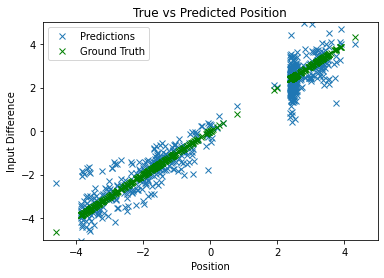

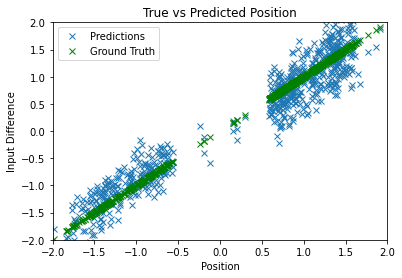

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_3.pth
[3, 4,    11] training loss: 0.0031458141966029065


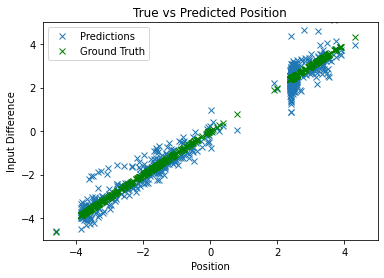

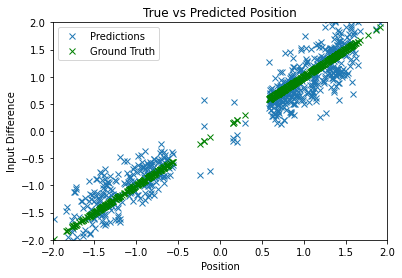

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.55s/it]

[3, 5,    11] training loss: 0.004253903813030679


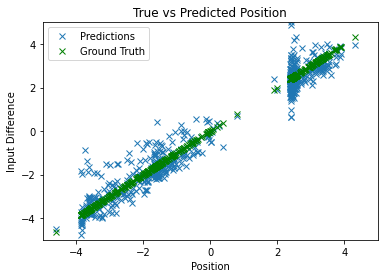

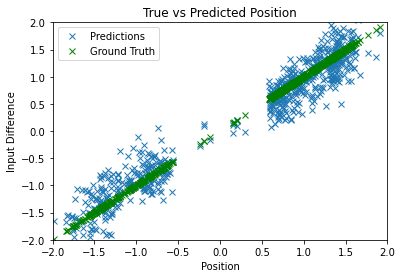

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

[3, 6,    11] training loss: 0.009656892926324897


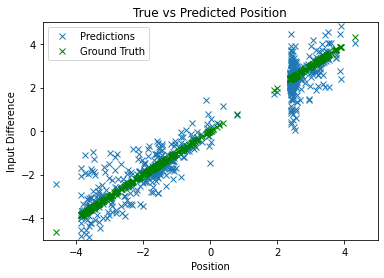

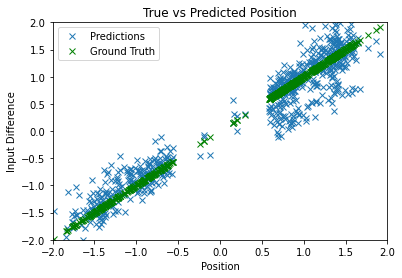

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.55s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_6.pth
[3, 7,    11] training loss: 0.0049653543465514715


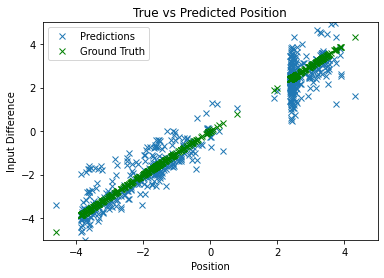

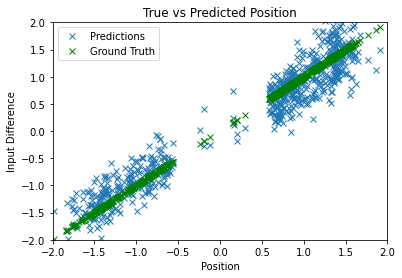

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.57s/it]

[3, 8,    11] training loss: 0.005093933977243904


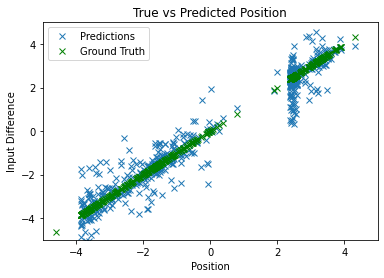

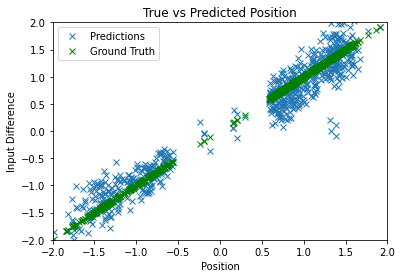

100%|████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_8.pth
[3, 9,    11] training loss: 0.0036749095411344615


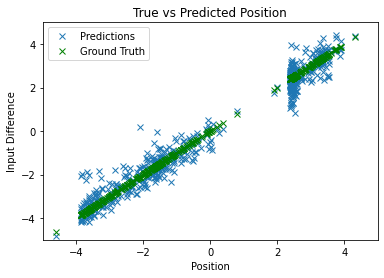

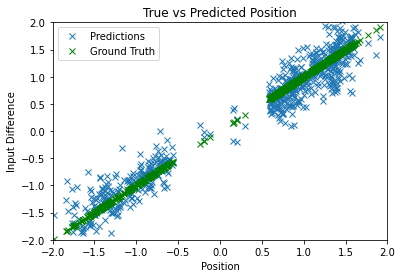

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_9.pth
[3, 10,    11] training loss: 0.002893244704594993


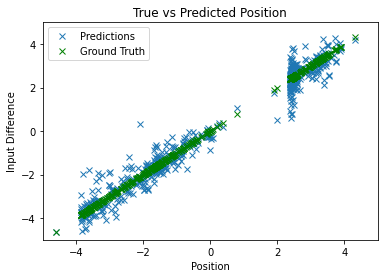

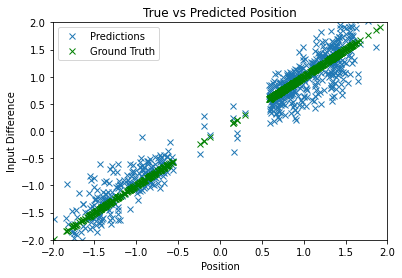

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

[3, 11,    11] training loss: 0.012983902544927671


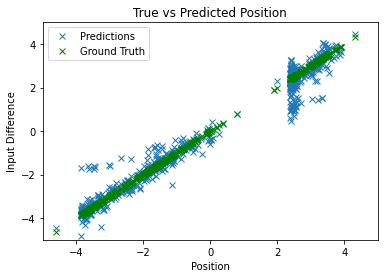

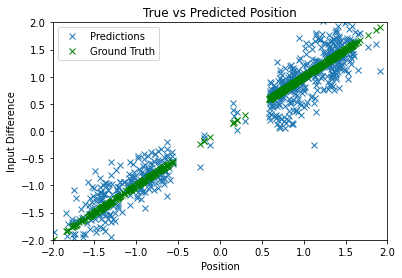

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.62s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_11.pth
[3, 12,    11] training loss: 0.0037316080989650874


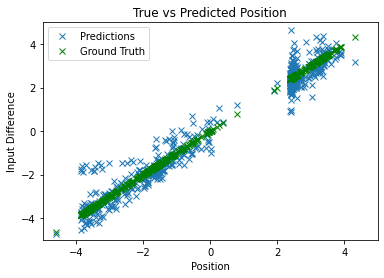

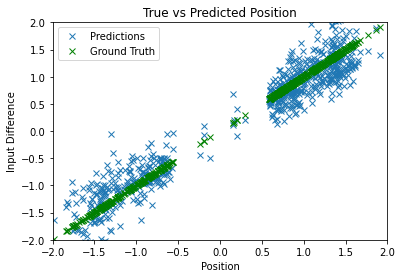

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.56s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_12.pth
[3, 13,    11] training loss: 0.0029750458793156706


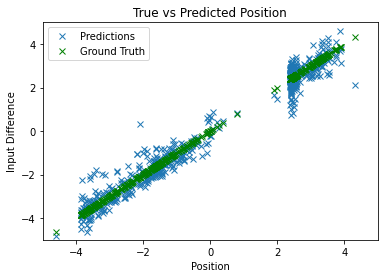

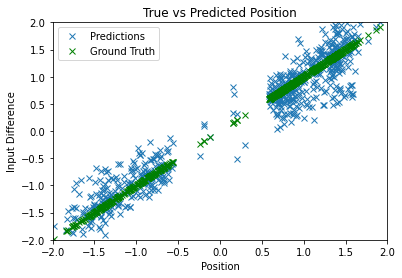

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.60s/it]

[3, 14,    11] training loss: 0.004815955212863358


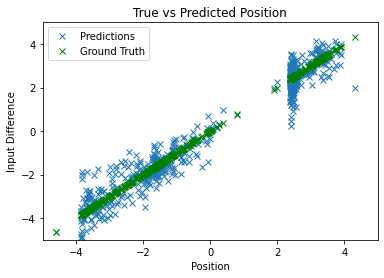

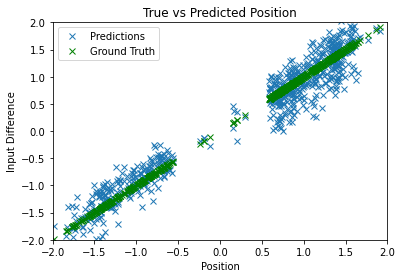

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.57s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_14.pth
[3, 15,    11] training loss: 0.004273368534953913


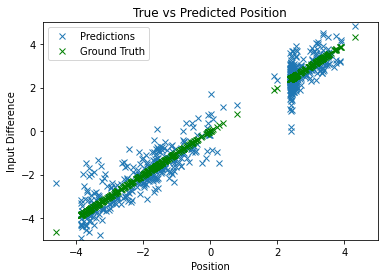

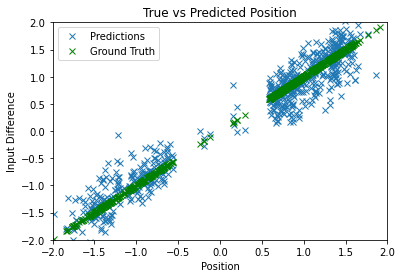

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

[3, 16,    11] training loss: 0.0051120495317809956


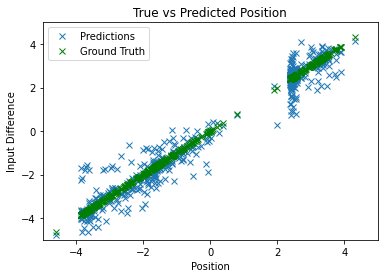

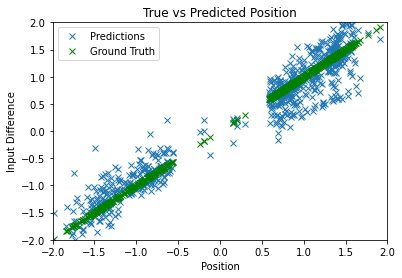

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.52s/it]

[3, 17,    11] training loss: 0.01272343114567792


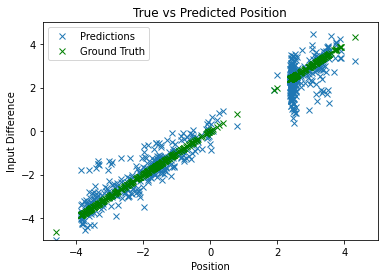

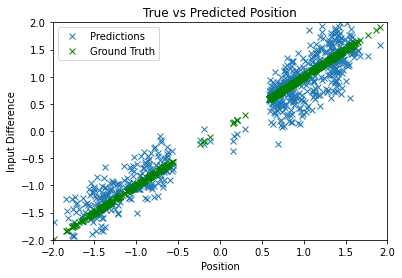

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.59s/it]

Saving Model as ./SaveMobNetModels/20220325_145128/model_20220325_145128_17.pth
[3, 18,    11] training loss: 0.0028476539409838146


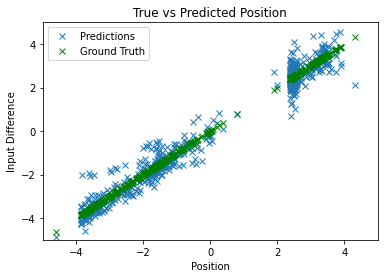

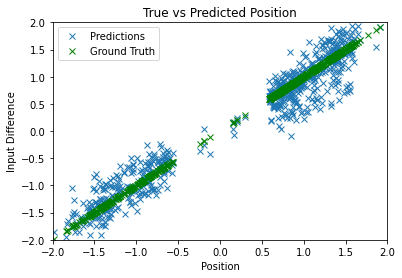

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:38<00:00,  3.54s/it]

[3, 19,    11] training loss: 0.002976539096982431


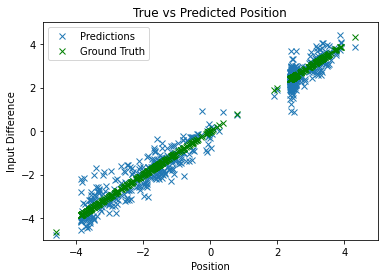

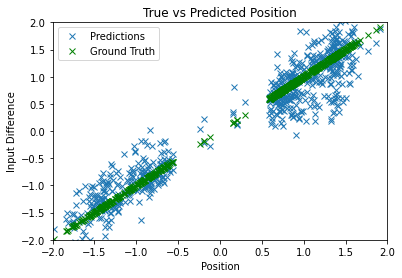

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:39<00:00,  3.58s/it]

[3, 20,    11] training loss: 0.00438579287488706


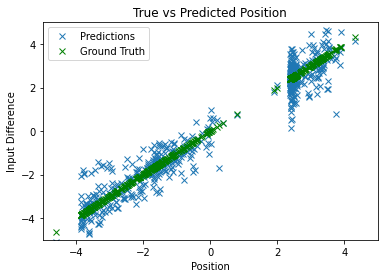

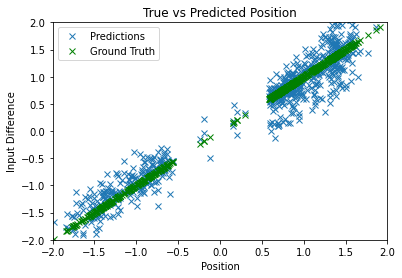

In [12]:
loss = nn.MSELoss()

lrs = [1e-3, 1e-4, 1e-5, 1e-6]

if JUST_MOBNET: 
    for i_lr in range(len(lrs)):
        optimizer = optim.Adam(net.parameters(), lr=lrs[i_lr], weight_decay=0.1)

        last_loss = float('inf')
        max_epochs = 20
        for epoch in range(max_epochs): 
            running_loss = 0 
            full_preds = []
            full_states = []
            #train
            for i, data in enumerate(tqdm(train_dataloader)): 
                imgs, inputs = data

                optimizer.zero_grad()
                preds = net(imgs)
                lossval = loss(preds, inputs)
                lossval.backward()
                optimizer.step()

                # print statistics
                running_loss += lossval.item()/train_size
                full_preds.append(preds)
                full_states.append(inputs)

            if running_loss < last_loss:
                model_path = './SaveMobNetModels/' + timestamp +'/model_{}_{}'.format(timestamp, epoch)+".pth"
                torch.save(net.state_dict(), model_path)
                print("Saving Model as " +  model_path )


            last_loss = running_loss



            print(f'[{i_lr}, {epoch + 1}, {i + 1:5d}] training loss: ' + str(running_loss))# + ", testing loss: " + str(test_loss))


            full_states = torch.reshape(torch.vstack(full_states), (train_size,2))
            full_preds = torch.reshape(torch.vstack(full_preds), (train_size,2))

            if JUST_MOBNET: 
                for i in range(2): 
                    plt.figure()
                    plt.plot(full_states[:,i],full_preds[:,i].detach().numpy(), 'x')
                    plt.plot(full_states[:,i],full_states[:,i].detach().numpy(), 'x', color="g")
                    plt.xlabel("Position")
                    plt.ylabel("Input Difference")
                    if i == 0:
                        plt.xlim((-5,5))
                        plt.ylim((-5,5))
                    else:
                        plt.xlim((-2,2))
                        plt.ylim((-2,2))
                    plt.title("True vs Predicted Position")
                    plt.legend(['Predictions', 'Ground Truth'])
                    plt.show()
        # plt.figure()
        # plt.plot(full_states,abs(full_preds.detach().numpy() - full_states.detach().numpy()), 'x')
        # plt.xlabel("Position")
        # plt.ylabel("Input Difference")
        # plt.title("|input_true - input_network|")
        # plt.show()

    #     test_states = torch.reshape(torch.hstack(test_states), (test_size, ))
    #     test_preds = torch.reshape(torch.hstack(test_preds), (test_size,))
        # plt.figure()
        # plt.plot(test_states,abs(test_preds.detach().numpy() - test_states.detach().numpy()), 'x')
        # plt.xlabel("Position")
        # plt.ylabel("Input Difference")
        # plt.title("|input_true - input_network|")
        # plt.show()

        #     print("Iteration : ", i, ", loss = ", lossval.item())
        #     if i%10 == 0: 
        #         plt.figure()
        #         plt.plot(x,pred.detach().numpy(), 'x')
        #         plt.plot(x, x.detach().numpy(), 'x', color='g')
        #         plt.legend(["learned model", "true controller"])
        #         plt.xlabel("Position")
        #         plt.ylabel("Input Difference")
        #         plt.title("True vs Network Ouputs, iteration: " + str(i))
        #         plt.show()

        # plt.figure()
        # plt.plot(x,abs(pred.detach().numpy() - x.detach().numpy()), 'x')
        # plt.xlabel("Position")
        # plt.ylabel("Input Difference")
        # plt.title("|input_true - input_network|")
        # plt.show()

In [ ]:
if JUST_MOBNET: 
    for i in range(2): 
        plt.figure()
        plt.plot(full_states[:,i],full_preds[:,i].detach().numpy(), 'x')
        plt.plot(full_states[:,i],full_states[:,i].detach().numpy(), 'x', color="g")
        plt.xlabel("Position")
        plt.ylabel("Input Difference")
        plt.title("True vs Predicted Position")
        plt.legend(['Predictions', 'Ground Truth'])
        plt.show()

## Try Embedding the CBF

In [ ]:
from controllers import * 

l = 20  # length of the track (ex 400 m )
w = 2  # width of track (ex 6m)
l /= 4

class CBF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        """
        Generate the components of the barrier function that are need for the CBF-QP
        Input:  (batch x n) state representation
        Output: (batch x (m + 1)) for each batch there are m dimensions for -Lgh plus 1 for (alphah+Lfh)
        """

        ctx.save_for_backward(input)
        
        m = 2
        
        
        barrier_bits = Variable(torch.zeros([input.shape[0],3]), requires_grad = True)
        x_len = input.shape[0]
        alpha = 1
        for idx in range(x_len): 
            x = input[idx]
            Lgh, h = raceTrackBarrierBits(x)
            barrier_bits[idx,0] = -Lgh[0,0]
            barrier_bits[idx,1] = -Lgh[0,1]
            barrier_bits[idx,2] = alpha*h

        return barrier_bits

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_input = grad_output[:,0:2].clone()
        
        input, = ctx.saved_tensors
        for i in range(input.shape[0]): 
            dhdx, dLghdx = raceTrackBarrierPartialBits(input[idx])
            v = torch.tensor([[dLghdx[0,0], dLghdx[0,1], dLghdx[0,2]],
                              [dLghdx[1,0], dLghdx[1,1], dLghdx[1,2]], 
                              [    dhdx[0],     dhdx[1],     dhdx[2]]])
            grad_input[i,:] = torch.mm(grad_output[i,:],v)
        return grad_input


In [ ]:
import cvxpy as cp
import torch
from cvxpylayers.torch import CvxpyLayer

sigma = 1 
n, m = 3, 2
u = cp.Variable((m,1))
Lgh = cp.Parameter((1, m))
y = cp.Parameter((1,m))
h = cp.Parameter(1)
k_nom = cp.Parameter((m,1))

constraints = [Lgh@u -Lgh@y.T >= -alpha*h, y == sigma*Lgh]
objective = cp.Minimize(0.5 * cp.pnorm(u - k_nom, p=2))
problem = cp.Problem(objective, constraints)
assert problem.is_dpp()

cvxpylayer = CvxpyLayer(problem, parameters=[Lgh, h, k_nom], variables=[u])

# solve the problem
solution, = cvxpylayer(A_tch, b_tch)

# compute the gradient of the sum of the solution with respect to A, b
solution.sum().backward()